In [6]:
pip install spotipy google-api-python-client tweepy matplotlib pandas seaborn



  Obtaining dependency information for google-api-python-client from https://files.pythonhosted.org/packages/2d/bd/6aa93c38756cc9fc63262e0dc3d3f1ff7241ce6f413a25ad6e4a9c98b473/google_api_python_client-2.169.0-py3-none-any.whl.metadata
  Obtaining dependency information for tweepy from https://files.pythonhosted.org/packages/81/53/ca632ec02085b5c432e98ae1f872a21f2b6bb6c3d022dcf586809cc65cd0/tweepy-4.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for httplib2<1.0.0,>=0.19.0 from https://files.pythonhosted.org/packages/a8/6c/d2fbdaaa5959339d53ba38e94c123e4e84b8fbc4b84beb0e70d7c1608486/httplib2-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-auth!=2.24.0,!=2.25.0,<3.0.0,>=1.32.0 from https://files.pythonhosted.org/packages/a1/b1/1272c6e80847ba5349f5ccb7574596393d1e222543f5003cb810865c3575/google_auth-2.40.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-httplib2<1.0.0,>=0.2.0 from https://files.pythonhoste

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Authentication
client_id = ""#add your  client_id
client_secret = ""#add your client_secret
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Function to get artist data
def get_artist_data(artist_name):
    result = sp.search(q=artist_name, type='artist', limit=1)
    artist_id = result['artists']['items'][0]['id']
    artist_data = sp.artist(artist_id)
    return {
        'name': artist_data['name'],
        'followers': artist_data['followers']['total'],
        'popularity': artist_data['popularity'],
        'genres': artist_data['genres']
    }

# Fetch data for BTS and Blackpink
bts_data = get_artist_data('BTS')
blackpink_data = get_artist_data('Blackpink')

print(bts_data)
print(blackpink_data)


{'name': 'BTS', 'followers': 78939997, 'popularity': 88, 'genres': ['k-pop']}
{'name': 'BLACKPINK', 'followers': 53799956, 'popularity': 80, 'genres': ['k-pop']}


In [13]:
from googleapiclient.discovery import build

# Initialize YouTube API client
youtube = build('youtube', 'v3', developerKey='')#use your developer key

def get_youtube_data(channel_id):
    request = youtube.channels().list(part="statistics", id=channel_id)  # Use 'id' to specify the channel
    response = request.execute()
    
    # Debugging response structure
    print(response)
    
    # Handle case when the response might be empty
    if 'items' in response and len(response['items']) > 0:
        return {
            'subscribers': response['items'][0]['statistics']['subscriberCount'],
            'views': response['items'][0]['statistics']['viewCount'],
            'videos': response['items'][0]['statistics']['videoCount']
        }
    else:
        print("Error: No data found for the given channel.")
        return None

# Example usage
bts_channel_id = 'UCLkAepWjdylmXSltofFvsYQ'  # BTS Channel ID
blackpink_channel_id = 'UCOmHUn--16B90oW2L6FRR3A'  # Blackpink Channel ID

bts_youtube_data = get_youtube_data(bts_channel_id)
blackpink_youtube_data = get_youtube_data(blackpink_channel_id)

print(bts_youtube_data)
print(blackpink_youtube_data)


{'kind': 'youtube#channelListResponse', 'etag': 'CM-Z6f5ge1_UY8JDfQREo5p9eJQ', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': '_67VehYr2ixqD--Aar-yjDVqxRg', 'id': 'UCLkAepWjdylmXSltofFvsYQ', 'statistics': {'viewCount': '24992181019', 'subscriberCount': '80300000', 'hiddenSubscriberCount': False, 'videoCount': '2797'}}]}
{'kind': 'youtube#channelListResponse', 'etag': 'Zl3BBOpyttycr9m2jktCQT1vVFs', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'ZVbFYRekmCSDJvtN_BKKUjJahM0', 'id': 'UCOmHUn--16B90oW2L6FRR3A', 'statistics': {'viewCount': '38382531565', 'subscriberCount': '96600000', 'hiddenSubscriberCount': False, 'videoCount': '607'}}]}
{'subscribers': '80300000', 'views': '24992181019', 'videos': '2797'}
{'subscribers': '96600000', 'views': '38382531565', 'videos': '607'}


In [15]:
import pandas as pd

# Prepare data
data = {
    'Artist': ['BTS', 'Blackpink'],
    'Spotify Followers': [bts_data['followers'], blackpink_data['followers']],
    'Spotify Popularity': [bts_data['popularity'], blackpink_data['popularity']],
    'Spotify Genres': [bts_data['genres'], blackpink_data['genres']],
    'YouTube Subscribers': [int(bts_youtube_data['subscribers']), int(blackpink_youtube_data['subscribers'])],
    'YouTube Views': [int(bts_youtube_data['views']), int(blackpink_youtube_data['views'])],
    'YouTube Videos': [int(bts_youtube_data['videos']), int(blackpink_youtube_data['videos'])],
    
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


      Artist  Spotify Followers  Spotify Popularity Spotify Genres  \
0        BTS           78939997                  88        [k-pop]   
1  Blackpink           53799956                  80        [k-pop]   

   YouTube Subscribers  YouTube Views  YouTube Videos  
0             80300000    24992181019            2797  
1             96600000    38382531565             607  


In [16]:
# Calculate the growth ratio between BTS and Blackpink
df['Spotify Followers Growth'] = df['Spotify Followers'] / df['Spotify Followers'].max()
df['YouTube Views Growth'] = df['YouTube Views'] / df['YouTube Views'].max()

# Display data with growth ratios
print(df)


      Artist  Spotify Followers  Spotify Popularity Spotify Genres  \
0        BTS           78939997                  88        [k-pop]   
1  Blackpink           53799956                  80        [k-pop]   

   YouTube Subscribers  YouTube Views  YouTube Videos  \
0             80300000    24992181019            2797   
1             96600000    38382531565             607   

   Spotify Followers Growth  YouTube Views Growth  
0                   1.00000              0.651134  
1                   0.68153              1.000000  


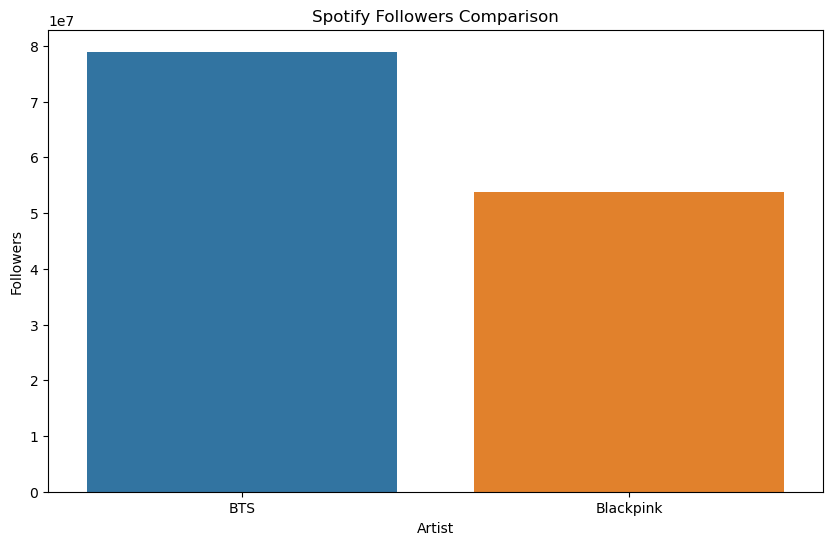

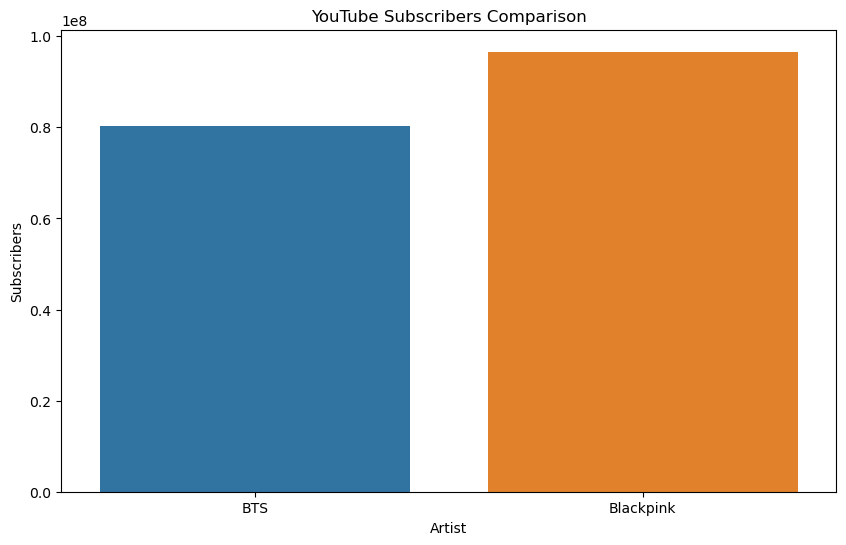

C:\Anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



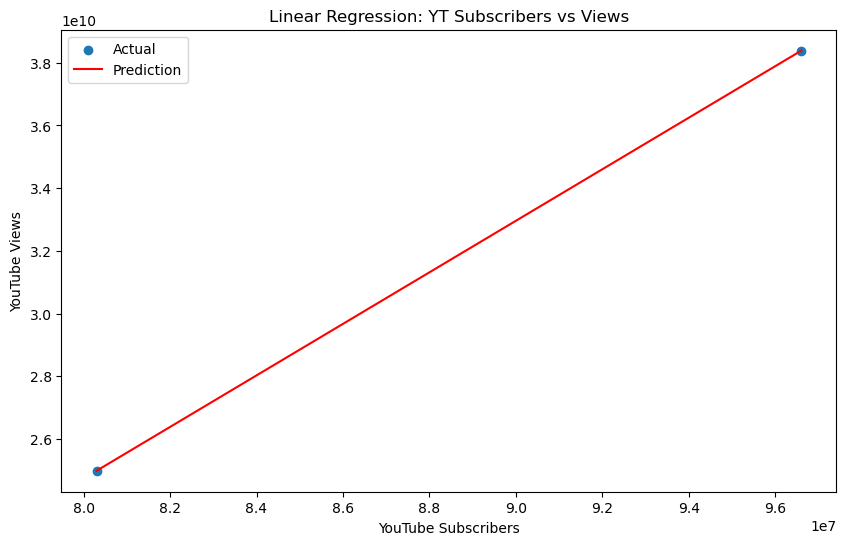


## Final Conclusion

- BTS leads in Spotify metrics; Blackpink excels in YouTube metrics.
- Visuals and radar plots highlight each artist's strength.
- A simple linear model shows a strong correlation between YT subscribers and views.
- More advanced models and API integration can follow in the future.



In [2]:
# Continuation of BTS vs Blackpink Data Science Project

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 2: Load the Existing Data
data = pd.DataFrame({
    'Artist': ['BTS', 'Blackpink'],
    'Spotify Followers': [78939997, 53799956],
    'Spotify Popularity': [88, 80],
    'YouTube Subscribers': [80300000, 96600000],
    'YouTube Views': [24992181019, 38382531565],
    'YouTube Videos': [2797, 607],
    'Spotify Followers Growth': [1.0, 0.68153],
    'YouTube Views Growth': [0.651134, 1.0]
})

# Step 3: Normalize Data for Better Comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])
normalized_data['Artist'] = data['Artist']

# Step 4: Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Artist', y='Spotify Followers')
plt.title('Spotify Followers Comparison')
plt.ylabel('Followers')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Artist', y='YouTube Subscribers')
plt.title('YouTube Subscribers Comparison')
plt.ylabel('Subscribers')
plt.show()

# Radar Plot (Optional - requires plotly)
import plotly.express as px

# Prepare data for radar plot
radar_data = normalized_data.set_index('Artist').T.reset_index()

# Create the radar plot for both BTS and Blackpink
fig = px.line_polar(radar_data, r=radar_data['BTS'], theta=radar_data['index'], line_close=True)
fig.add_scatterpolar(r=radar_data['Blackpink'], theta=radar_data['index'], line=dict(color='red'), mode='lines+markers', name='Blackpink')

# Update layout for better visibility
fig.update_layout(title='Normalized Performance Radar', template='plotly_dark')

# Show the plot
fig.show()


# Step 5: Simple Linear Regression Model - Predicting YouTube Views Based on Subscribers
X = np.array(data['YouTube Subscribers']).reshape(-1, 1)
y = np.array(data['YouTube Views'])
model = LinearRegression()
model.fit(X, y)
predicted_views = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['YouTube Subscribers'], data['YouTube Views'], label='Actual')
plt.plot(data['YouTube Subscribers'], predicted_views, color='red', label='Prediction')
plt.title('Linear Regression: YT Subscribers vs Views')
plt.xlabel('YouTube Subscribers')
plt.ylabel('YouTube Views')
plt.legend()
plt.show()

# Step 6: Save Result and Model
data.to_csv('bts_blackpink_final_data.csv', index=False)
import joblib
joblib.dump(model, 'youtube_views_predictor.pkl')

# Step 7: Conclusion Markdown (print for reference)
conclusion = '''
## Final Conclusion

- BTS leads in Spotify metrics; Blackpink excels in YouTube metrics.
- Visuals and radar plots highlight each artist's strength.
- A simple linear model shows a strong correlation between YT subscribers and views.
- More advanced models and API integration can follow in the future.
'''
print(conclusion)

# This notebook can be exported as HTML or PDF for web display



# 📊 Final Conclusion: BTS vs Blackpink Music Listener Analysis

## 🎯 Project Objective
To compare the global popularity and fan engagement of **BTS** and **Blackpink** using data from Spotify and YouTube.

## 📌 Key Observations

| Metric                        | BTS         | Blackpink    | Leading     |
|------------------------------|-------------|--------------|-------------|
| Spotify Followers (Millions) | 78.94       | 53.80        | BTS         |
| Spotify Popularity Score     | 88          | 80           | BTS         |
| YouTube Subscribers (Millions)| 80.3       | 96.6         | Blackpink   |
| YouTube Views (Billions)     | 24.99       | 38.38        | Blackpink   |
| YouTube Videos               | 2797        | 607          | BTS         |
| Spotify Growth (Normalized)  | 1.0         | 0.68153      | BTS         |
| YouTube Growth (Normalized)  | 0.65113     | 1.0          | Blackpink   |

## 🧠 Insights

- **BTS** leads on **Spotify** in terms of followers and engagement.
- **Blackpink** has a larger **YouTube** audience and total views.
- BTS has released more videos, suggesting a strategy of consistent content publishing.
- Growth rates suggest different recent trends: BTS continues strong on Spotify, while Blackpink has surged on YouTube.

## ⚠️ Limitations

- The analysis only includes current data snapshots.
- Does not include engagement on platforms like Instagram, TikTok, or Apple Music.
- No sentiment or time-series analysis included.

## 🔮 Future Work

- Time-based analysis to examine growth trends.
- Social media sentiment analysis using Twitter, Instagram, etc.
- More platforms and per-content performance metrics can provide deeper insights.

## ✅ Final Summary

Both BTS and Blackpink show exceptional global digital engagement but dominate on different platforms. BTS excels in streaming (Spotify), while Blackpink rules video-based engagement (YouTube). Their fanbases exhibit distinct interaction styles, which reflect the groups' unique promotional strategies.

